# Section A

 ### Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

 ### Read Data

In [2]:
data = pd.read_csv('fashion-mnist_train.csv')
# Display the first five rows
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Random sampling of size 2000 data from original dataset 

In [3]:
df = data.sample(n=2000)
df.shape

(2000, 785)

#### To check if there is label imbalance happened due to random sampling.

In [4]:
label = df['label'].unique()
for i in label:
    print(df[df['label']==i].shape[0])

179
231
208
183
197
192
211
196
198
205


In [5]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
45723,0,0,0,1,0,0,0,0,0,0,...,71,89,93,0,0,1,0,0,0,0
36547,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29955,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32472,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28177,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,89,89,63,0,0,0


In [6]:
target = df['label']
image = df.drop(['label'],axis=1)

In [7]:
image.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
45723,0,0,1,0,0,0,0,0,0,25,...,71,89,93,0,0,1,0,0,0,0
36547,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32472,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28177,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,89,89,63,0,0,0


### Image of first 30 datapoints

In [8]:
# Manually enter the meaningful name of each label
label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [15]:
target_df = target.to_frame()

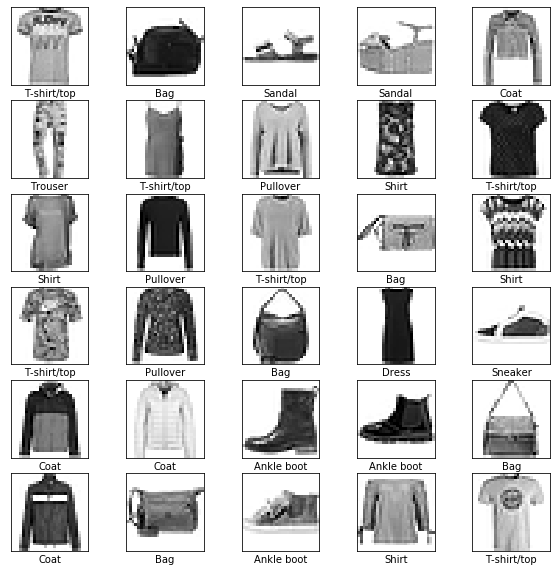

In [16]:
# Set the figure size
plt.figure(figsize=(10,10))
# Show only the first 30 pictures
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.array(image.iloc[i, :]).reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(label[target_df.label.iloc[i]])

# Section B

### Learning k-means model from dataset

In [18]:
from sklearn.cluster import KMeans

In [19]:
kmeans= KMeans(n_clusters=10,random_state=3) 
kmeans.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=3, tol=0.0001, verbose=0)

In [20]:
label = kmeans.labels_

In [21]:
kmeans.cluster_centers_.shape

(10, 784)

### Visualization of cluster centroid for each label

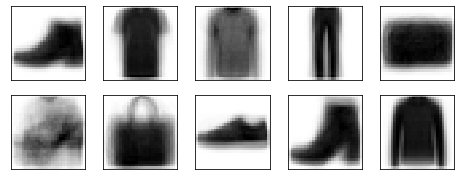

In [22]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10,28,28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

# Section C

### PCA preprocessing

In [23]:
from __future__ import print_function
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import decomposition
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [24]:
pca = PCA(n_components=50)
pca.fit(image)
X_pca = pca.transform(image)
print("original shape:   ", image.shape)
print("transformed shape:", X_pca.shape)
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))

original shape:    (2000, 784)
transformed shape: (2000, 50)
Cumulative explained variation for 50 principal components: 0.8647490196222165


### t-SNE embedding

In [25]:
tsne = TSNE(n_components=2, verbose=0, perplexity=30)
tsne_pca_results = tsne.fit_transform(X_pca)

In [26]:
tsne_pca_results

array([[-25.19462  ,   4.4388833],
       [ 26.103506 ,  26.231113 ],
       [ 48.463856 ,  -6.204783 ],
       ...,
       [-24.70902  , -28.89425  ],
       [  6.6541085,   2.66098  ],
       [  1.1466202,  15.641619 ]], dtype=float32)

In [27]:
tsne_result = pd.DataFrame({'tsne-2d-one': tsne_pca_results[:, 0], 'tsne-2d-two': tsne_pca_results[:, 1],'label':target})
tsne_result.head()

,tsne-2d-one,tsne-2d-two,label
45723,-25.194620,4.438883,0
36547,26.103506,26.231113,8
29955,48.463856,-6.204783,5
32472,31.955509,-7.977186,5
28177,1.738859,13.446553,4


###  Visualization of ground truth label with t-SNE embedding

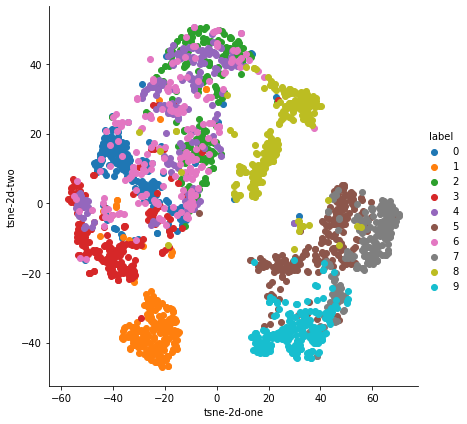

In [28]:
sns.FacetGrid(tsne_result, hue='label', height=6).map(plt.scatter, 'tsne-2d-one', 'tsne-2d-two').add_legend()
plt.show()

#### Item and numerical label lookup
0 => T-shirt/top;
1 => Trouser;
2 => Pullover;
3 => Dress;
4 => Coat;
5 => Sandal;
6 => Shirt;
7 => Sneaker;
8 => Bag;
9 => Ankle boot;

### Visualization of k-means cluster with t-SNE embedding

In [29]:
tsne_result = pd.DataFrame({'tsne-2d-one': tsne_pca_results[:, 0], 'tsne-2d-two': tsne_pca_results[:, 1],'label':label})
tsne_result.head()

,tsne-2d-one,tsne-2d-two,label
0,-25.194620,4.438883,2
1,26.103506,26.231113,4
2,48.463856,-6.204783,5
3,31.955509,-7.977186,5
4,1.738859,13.446553,2


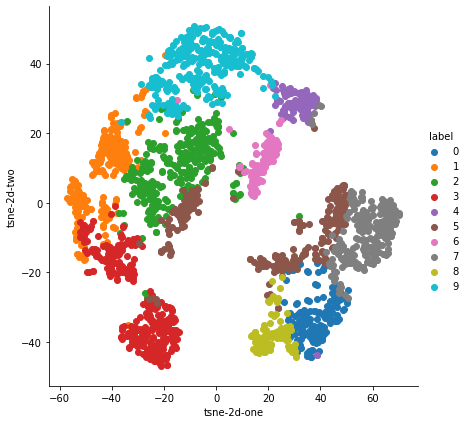

In [30]:
sns.FacetGrid(tsne_result, hue='label', height=6).map(plt.scatter, 'tsne-2d-one', 'tsne-2d-two').add_legend()
plt.show()

### Inference

The overall t-SNE geometric disribution of ground truth and clustered label are same. Few labels of ground value are scattered while k-means captured the pattern very well. However, few label of ground truth is broken into different clusters by k-means. Hopefully, it can be inferred that PCA and t-SNE embedding dataset before clustering would capture the same outcome as learning k-means from actual dataset.